Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
%matplotlib inline
from imblearn.over_sampling import SMOTE
import scipy.stats as stat
import pylab
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable
import scipy
from scipy.special import boxcox1p
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import FunctionTransformer,PowerTransformer

Reading the data

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head(4)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238


Describing the data

In [4]:
data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


The max value of all features is less than 4

By seeing 25th percentile of all the features it is less than 0

By seeing 50th percentile value,some features vlaues lie below 0 and for some features it is greater than 0

By seeing 75th percentile value of all the features it is greater than 0

We can conclude that features follow somewhat gaussian distribution.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


There are 301 columns which have float value and 1 column which has integer value

In [6]:
print(data['target'].value_counts())

print("total count of class 1 is" ,sum(data['target']==1))
print("total count of class 0 is" ,sum(data['target']==0))

1.0    160
0.0     90
Name: target, dtype: int64
total count of class 1 is 160
total count of class 0 is 90


Counting the number of class labels on the basis of class 0 and class 1

The class label 1 has 160 rows

The class label 0 has 90 rows


In [7]:
data.iloc[:,2:]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-1.199,0.466,-0.908,2.771,1.631,0.931,0.182,-0.652,-0.512,0.400,...,0.724,0.177,-0.039,0.759,0.461,-0.243,0.525,0.281,-0.255,-1.136
246,0.237,0.233,-0.380,-1.748,0.839,-0.721,-0.114,0.005,-1.788,1.416,...,0.857,0.147,0.601,-0.210,-0.768,1.004,-0.979,0.007,0.112,-0.558
247,1.411,-1.465,0.119,0.583,1.634,-0.207,1.173,1.622,-0.071,-0.695,...,-0.499,-0.455,0.759,0.222,0.105,-0.727,0.461,0.760,0.168,-0.719
248,0.620,1.040,0.184,-0.570,-0.087,-0.748,-1.559,-0.553,0.552,1.284,...,0.557,-1.494,0.977,0.882,-1.512,0.478,-0.910,-0.805,2.029,-0.423


Taking all the features will be later used

## Exploratory Data Analysis

EDA is done by the points mentioned by "How to do EDA" by appliedAiCourse live session and idea has taken from iris eda which is mentioned in course.


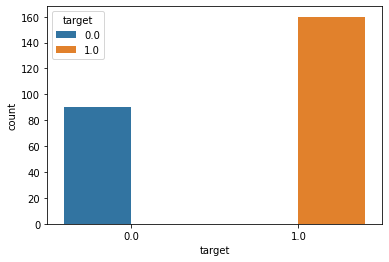

The percentage of class 0 label is 36.0
The percentage of class 1 label is 64.0


In [8]:
sns.countplot(x="target",data=data,hue="target")
plt.show()
print("The percentage of class 0 label is",sum(data['target']==0)/(len(data['target']))*100)
print("The percentage of class 1 label is",sum(data['target']==1)/(len(data['target']))*100)

We can see from the countplot that this dataset is imabalance

We will balance it by technique called SMOTE which is done in later cells

##  2D scatter plots of class label w.r.t different features

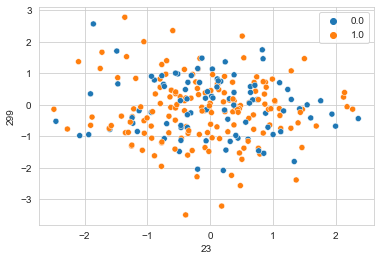

In [9]:
sns.set_style("whitegrid")
sns.scatterplot(x="23",y="299",hue="target",data=data)
plt.legend()
plt.show()

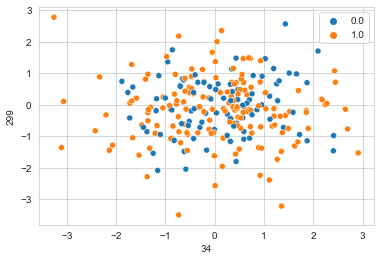

In [10]:
sns.set_style("whitegrid")
sns.scatterplot(x="34",y="299",data=data, hue="target")
plt.legend()
plt.show()

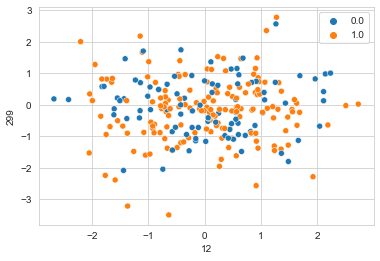

In [11]:
sns.set_style("whitegrid")
sns.scatterplot(x="12",y="299",data=data,hue="target")
plt.legend()
plt.show()

Observations:

Scatter plots is showing we can't classify the 2 class labels easily as they are highly overlapping.

The one feature is fixed which is 299(y-axis) and the other feature is random(x-axis).



## Checking if any columns contain any null value

In [12]:
data.columns[data.isnull().any()].tolist()

[]

There is no null value in the dataset.

## Plotting histogram of random features

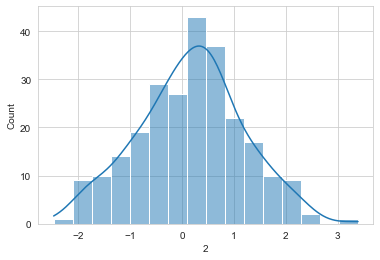

In [13]:
sns.histplot(x="2",data=data,kde=True)
plt.show()

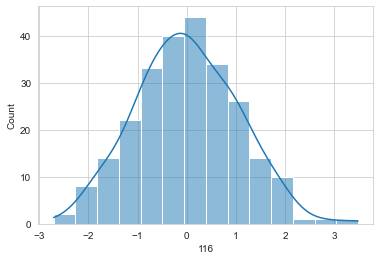

In [14]:
sns.histplot(x="116",data=data,kde=True)
plt.show()

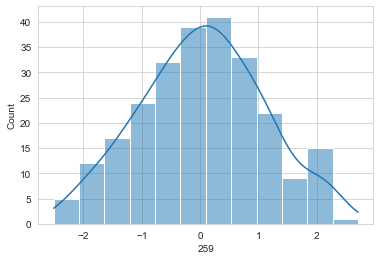

In [15]:
sns.histplot(x="259",data=data,kde=True)
plt.show()

<AxesSubplot:xlabel='123', ylabel='Count'>

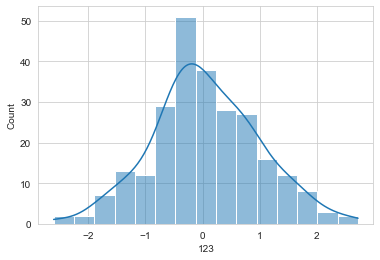

In [16]:
sns.histplot(x="123",data=data,kde=True)

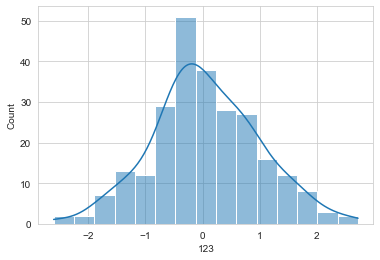

In [17]:
sns.histplot(x="123",data=data,kde=True)
plt.show()

The histogram plot shows that the feature is following somewhat gaussian distribution.

There is no gaussian distribution which is highly skewed on right side as well as left side.

# Histogram plot of first 100 features

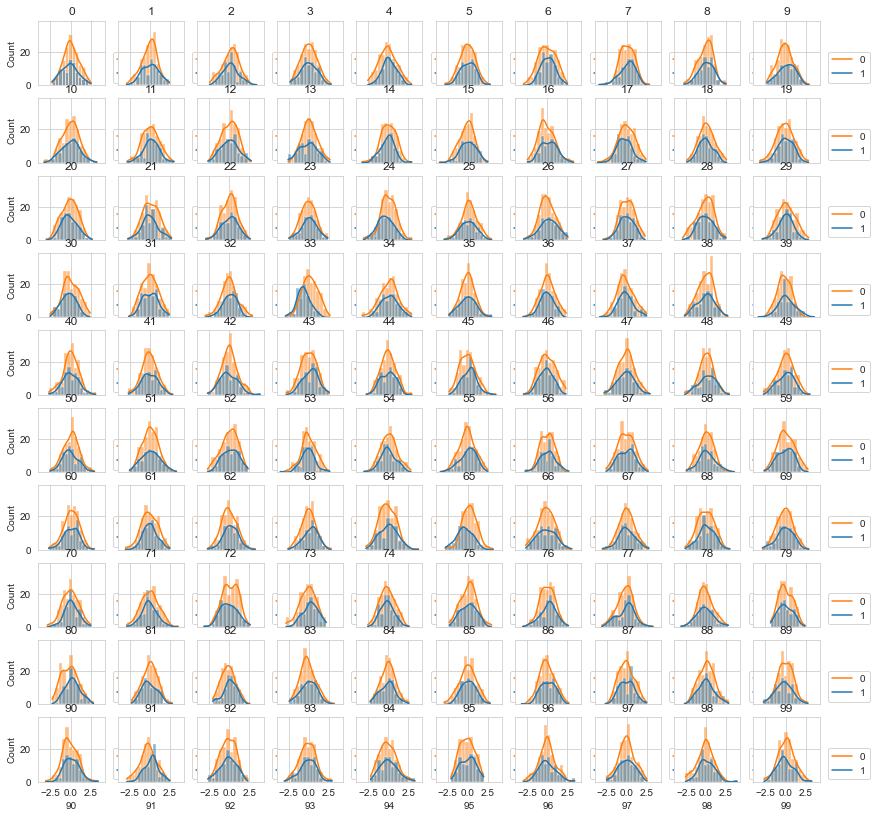

In [18]:
# got an idea from kaggle profile https://www.kaggle.com/code/artgor/how-to-not-overfit/notebook

fig, ax = plt.subplots(10, 10,sharex=True,sharey=True ,figsize = (14,14))
ax=ax.reshape(-1)
# print(ax)
for i,j in enumerate (data.iloc[:,2:102]):
    g=sns.histplot(x=data[j],hue="target",kde=True,data=data,ax=ax[i])
    ax[i].set_title(j)
    g.legend(["0","1"],
           bbox_to_anchor = (1.05, 0.6))
plt.show()

Plotted the histogram of first 100 features.

Histogram is plotted on the class label(0 and 1).

We can clearly see features follow somewhat gaussian not proper gaussian distribution on both class label 0 and 1.

We can also see the pdf are not purely symmetric on y-axis centered on mean.

There is no gaussian distribution which is highly skewed on right side as well as left side.


## Pairplot

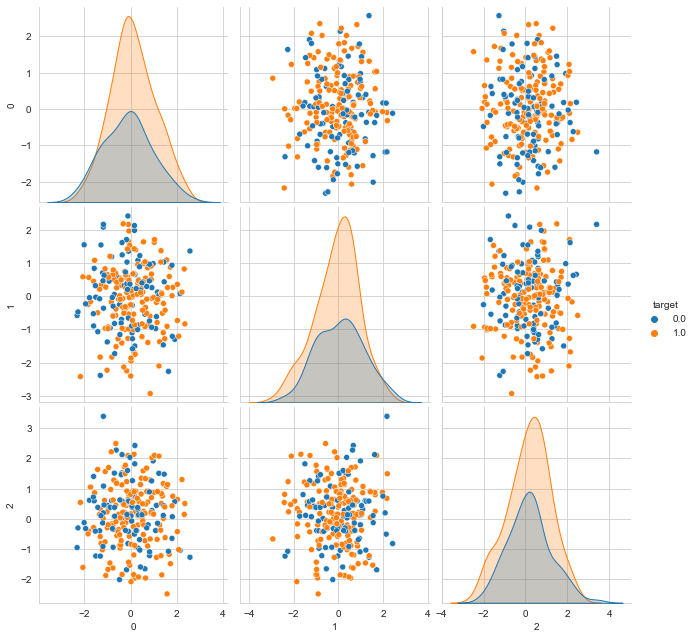

In [19]:
plt.close()
sns.set_style("whitegrid")
feat=data.columns[1:5]
sns.pairplot(data[feat],height=3,hue="target")
plt.show()

Features are highly overlapping need to do some feature enginnering to distinguish between features.

We can also see the correlation between features and target variable to find best features

## Correlations of features with target (class label)

In [20]:
data_copy=data.drop(['id'],axis=1)
data_copy.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


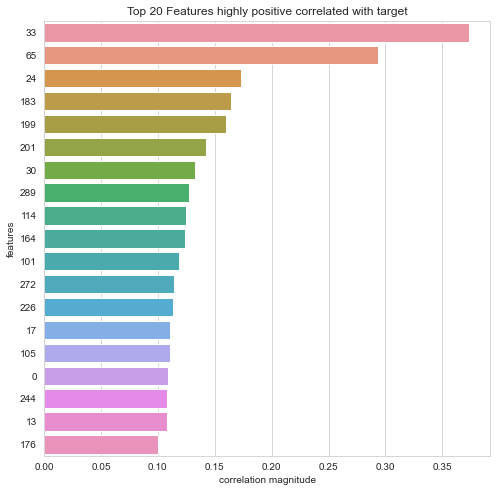

In [21]:
correlations=data_copy[data_copy.columns[:]].corr()['target']
positive_correlations=correlations.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,8))
sns.barplot(x=positive_correlations.values[1:],y=positive_correlations.index[1:])
plt.xlabel("correlation magnitude")
plt.ylabel("features")
plt.title("Top 20 Features highly positive correlated with target")
plt.show()

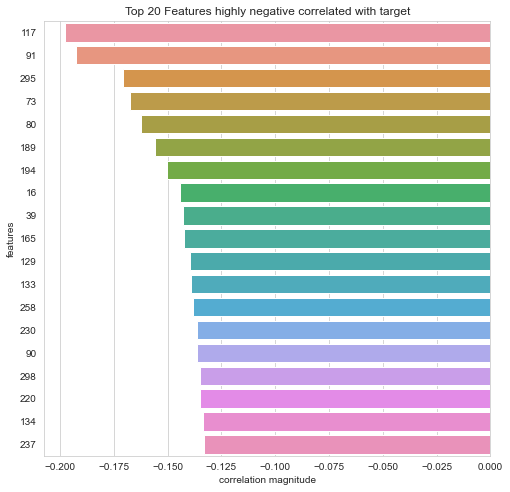

In [22]:
negative_correlations=correlations.sort_values(ascending=True)[:20]
plt.figure(figsize=(8,8))
sns.barplot(x=negative_correlations.values[1:],y=negative_correlations.index[1:])
plt.xlabel("correlation magnitude")
plt.ylabel("features")
plt.title("Top 20 Features highly negative correlated with target")
plt.show()


Make the correlations of features with target and find out which features are correlated with target variable

We have plot these features using barplot

We have find out top 20 highly positive correlated feature with target variable similarly top 20 highly negative coorelated features with target variable

We can use these features in our model while doing classification


## Making pairplot of top 3 positive correlated features

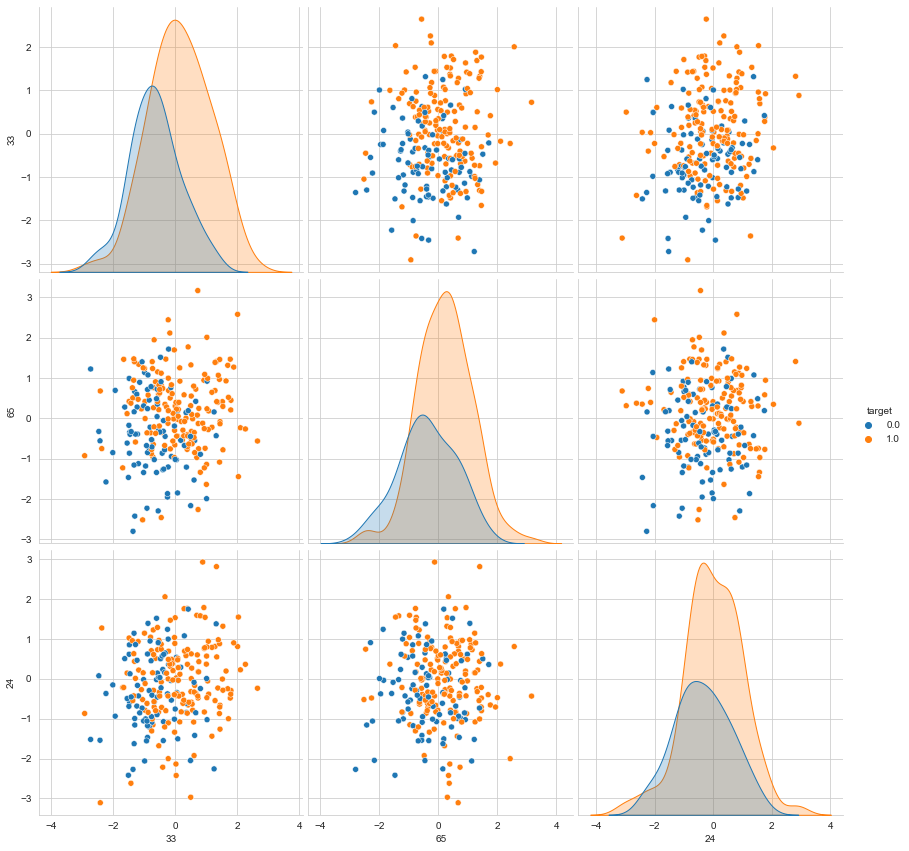

In [23]:
sns.pairplot(data[['33','65','24','target']],hue="target",height=4)
plt.show()

## Making pairplot of top 3 negative correlated features

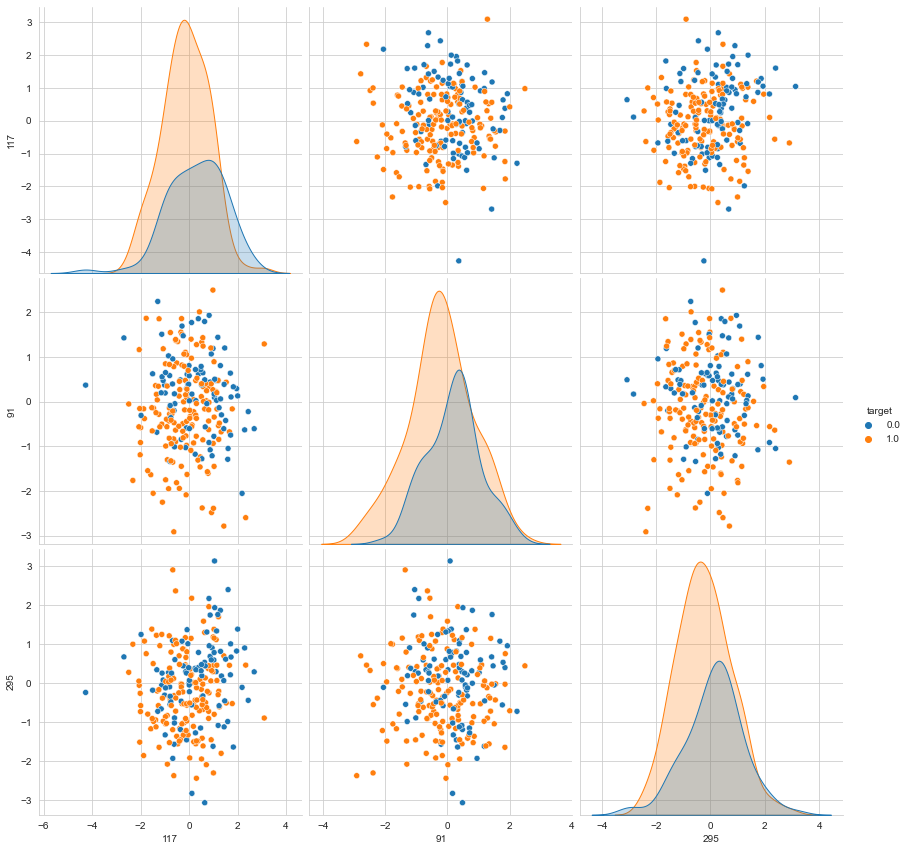

In [24]:
sns.pairplot(data[['117','91','295','target']],hue="target",height=4)
plt.show()

The pairplot are showing that these features are highly correlated with target 

They have high overlapping with class 0 and class 1 can be seen from PDF

## Box-plot

## Plotting box plot of random features

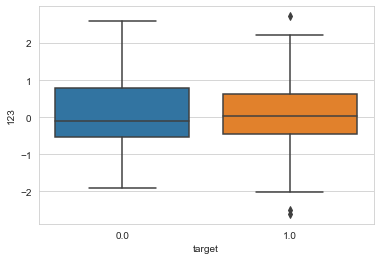

+-------------------+-------------+----------------------+
| percentile_number | class_label |        values        |
+-------------------+-------------+----------------------+
|         25        |      0      | -0.5215000000000001  |
|         25        |      1      | -0.46024999999999994 |
|         50        |      0      |       -0.0925        |
|         50        |      1      | 0.042499999999999996 |
|         75        |      0      |  0.8017500000000001  |
|         75        |      1      |        0.6315        |
+-------------------+-------------+----------------------+


In [25]:
sns.boxplot(x="target",y='123',data=data)
plt.show()
table=PrettyTable(['percentile_number','class_label','values'])
table.add_row([25,0,np.percentile(data[data['target']==0]['123'],25)])
table.add_row([25,1,np.percentile(data[data['target']==1]['123'],25)])
table.add_row([50,0,np.percentile(data[data['target']==0]['123'],50)])
table.add_row([50,1,np.percentile(data[data['target']==1]['123'],50)])
table.add_row([75,0,np.percentile(data[data['target']==0]['123'],75)])
table.add_row([75,1,np.percentile(data[data['target']==1]['123'],75)])
print(table)


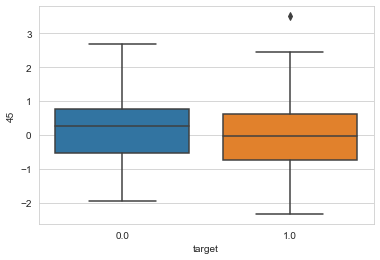

+-------------------+-------------+----------------------+
| percentile_number | class_label |        values        |
+-------------------+-------------+----------------------+
|         25        |      0      | -0.5215000000000001  |
|         25        |      1      | -0.46024999999999994 |
|         50        |      0      |       -0.0925        |
|         50        |      1      | 0.042499999999999996 |
|         75        |      0      |  0.8017500000000001  |
|         75        |      1      |        0.6315        |
+-------------------+-------------+----------------------+


In [26]:
sns.boxplot(x="target",y='45',data=data)
plt.show()
table=PrettyTable(['percentile_number','class_label','values'])
table.add_row([25,0,np.percentile(data[data['target']==0]['123'],25)])
table.add_row([25,1,np.percentile(data[data['target']==1]['123'],25)])
table.add_row([50,0,np.percentile(data[data['target']==0]['123'],50)])
table.add_row([50,1,np.percentile(data[data['target']==1]['123'],50)])
table.add_row([75,0,np.percentile(data[data['target']==0]['123'],75)])
table.add_row([75,1,np.percentile(data[data['target']==1]['123'],75)])
print(table)


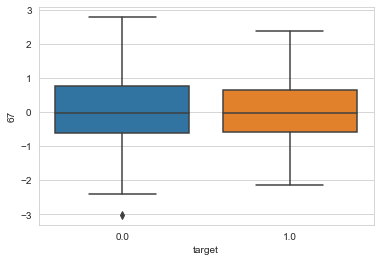

+-------------------+-------------+----------------------+
| percentile_number | class_label |        values        |
+-------------------+-------------+----------------------+
|         25        |      0      | -0.5215000000000001  |
|         25        |      1      | -0.46024999999999994 |
|         50        |      0      |       -0.0925        |
|         50        |      1      | 0.042499999999999996 |
|         75        |      0      |  0.8017500000000001  |
|         75        |      1      |        0.6315        |
+-------------------+-------------+----------------------+


In [27]:
sns.boxplot(x="target",y='67',data=data)
plt.show()
table=PrettyTable(['percentile_number','class_label','values'])
table.add_row([25,0,np.percentile(data[data['target']==0]['123'],25)])
table.add_row([25,1,np.percentile(data[data['target']==1]['123'],25)])
table.add_row([50,0,np.percentile(data[data['target']==0]['123'],50)])
table.add_row([50,1,np.percentile(data[data['target']==1]['123'],50)])
table.add_row([75,0,np.percentile(data[data['target']==0]['123'],75)])
table.add_row([75,1,np.percentile(data[data['target']==1]['123'],75)])
print(table)


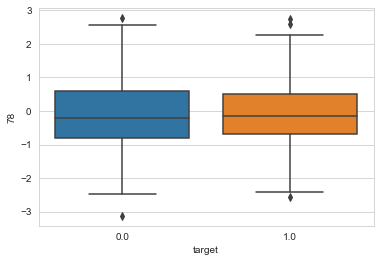

+-------------------+-------------+----------------------+
| percentile_number | class_label |        values        |
+-------------------+-------------+----------------------+
|         25        |      0      | -0.5215000000000001  |
|         25        |      1      | -0.46024999999999994 |
|         50        |      0      |       -0.0925        |
|         50        |      1      | 0.042499999999999996 |
|         75        |      0      |  0.8017500000000001  |
|         75        |      1      |        0.6315        |
+-------------------+-------------+----------------------+


In [28]:
sns.boxplot(x="target",y='78',data=data)
plt.show()
table=PrettyTable(['percentile_number','class_label','values'])
table.add_row([25,0,np.percentile(data[data['target']==0]['123'],25)])
table.add_row([25,1,np.percentile(data[data['target']==1]['123'],25)])
table.add_row([50,0,np.percentile(data[data['target']==0]['123'],50)])
table.add_row([50,1,np.percentile(data[data['target']==1]['123'],50)])
table.add_row([75,0,np.percentile(data[data['target']==0]['123'],75)])
table.add_row([75,1,np.percentile(data[data['target']==1]['123'],75)])
print(table)


By plotting box blots of various random features we can see that mean is around 0 for both class 0 and class 1

There are some outliers in features but these outliers are not in large number.

The 75th percentile of all class 1 and 0 is greater than 0

The 50th percentile of class 1 is greater than 0 and class 0 is less than 0

The 25th percentile of class 1 and class 0 is less than 0

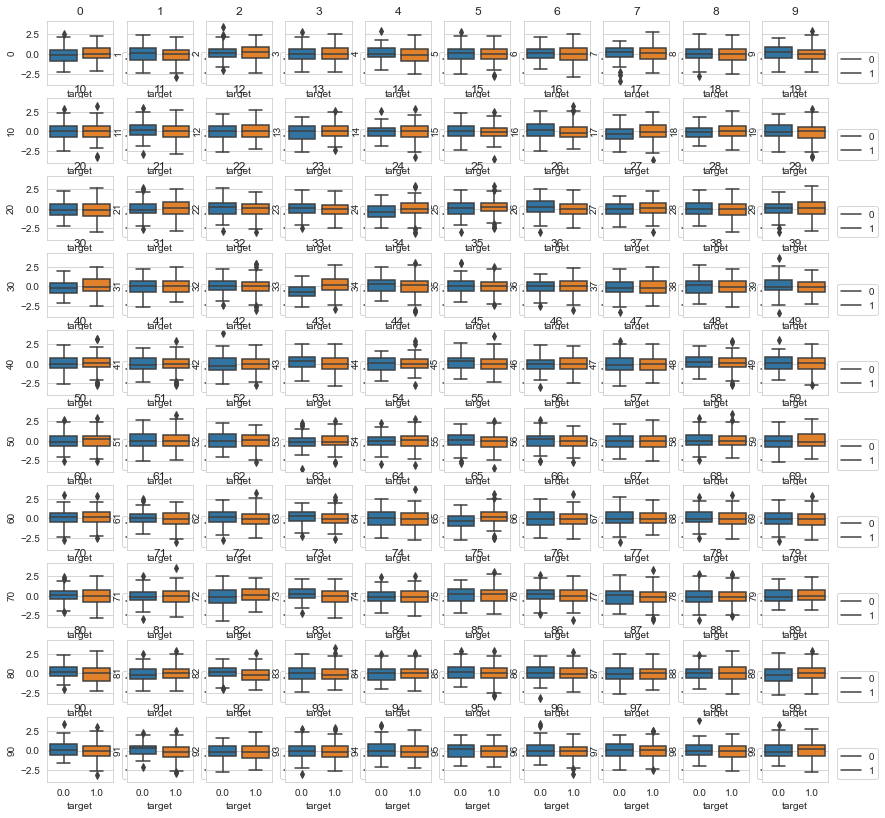

In [29]:
# got an idea from github profile https://github.com/mdmub0587/Dont-Overfit-II/blob/master/EDA_and_FE.ipynb
fig, ax = plt.subplots(10, 10,sharex=True,sharey=True ,figsize = (14,14))
ax=ax.reshape(-1)
# print(ax)
for i,j in enumerate (data.iloc[:,2:102]):
    g=sns.boxplot(x="target",y=data[j],data=data,ax=ax[i])
    ax[i].set_title(j)
    g.legend(["0","1"],
           bbox_to_anchor = (1.05, 0.6))
plt.show()

We have drawn the box plot of first 100 features.

We can see that median of all the features lie around 0

There are some outliers in w.r.t class labels but we can't remove them as we have very less data.



## Visualizing with PCA

(250, 2)
[0.01431672 0.01393798]


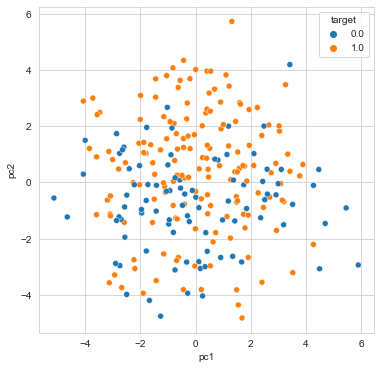

In [30]:
pca=PCA(n_components=2)
pca.fit(data.drop(['id','target'],axis=1))
x=pca.transform(data.drop(['id','target'],axis=1))
print(x.shape)
# pca.components_
plt.figure(figsize=(6,6))
sns.scatterplot(x=x[:,0],y=x[:,1],hue=data['target'],cmap='rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
print(pca.explained_variance_ratio_)

(250, 5)
[0.01431672 0.01393798 0.01359807 0.01318352 0.01312196]


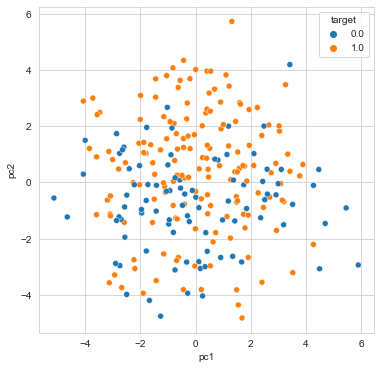

In [31]:
pca=PCA(n_components=5)
pca.fit(data.drop(['id','target'],axis=1))
x=pca.transform(data.drop(['id','target'],axis=1))
print(x.shape)
# pca.components_
plt.figure(figsize=(6,6))
sns.scatterplot(x=x[:,0],y=x[:,1],hue=data['target'],cmap='rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
print(pca.explained_variance_ratio_)

(250, 10)
[0.01431672 0.01393798 0.01359807 0.01318352 0.01312196 0.01278289
 0.01258938 0.0123625  0.01225155 0.01205223]


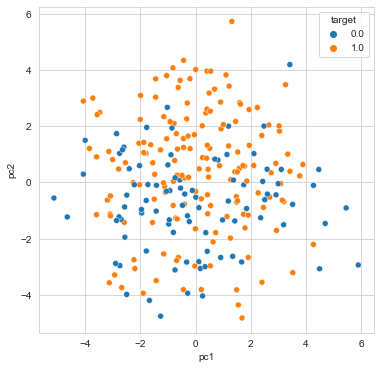

In [32]:
pca=PCA(n_components=10)
pca.fit(data.drop(['id','target'],axis=1))
x=pca.transform(data.drop(['id','target'],axis=1))
print(x.shape)
# pca.components_
plt.figure(figsize=(6,6))
sns.scatterplot(x=x[:,0],y=x[:,1],hue=data['target'],cmap='rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
print(pca.explained_variance_ratio_)

# Correlation between features 

In [33]:
data_1=data.drop(['id','target'],axis=1)
data_1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


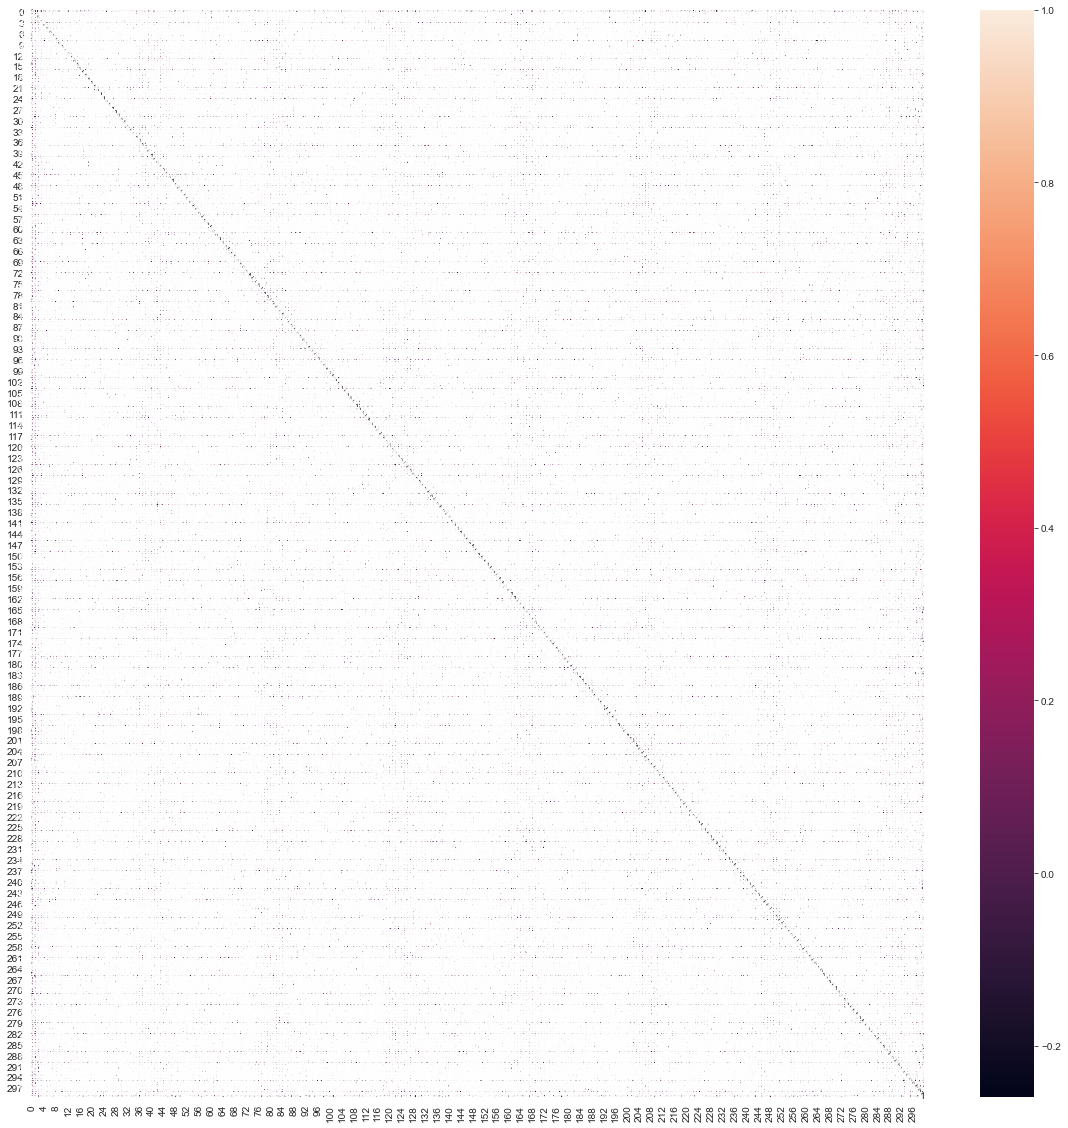

In [34]:
corr_feat=data_1.corr()
corr_feat
plt.figure(figsize=(20,20))
sns.heatmap(corr_feat,annot=True)
plt.show()

Made the correlation with features to features.

We can see that features are not highly correalted with each other

## Plotting QQ plots of various features

In [35]:
# got an idea from krish naik youtube video

def QQ_plot(data,feature):
    """
    Made a function called QQ_plot
    Input:Data and feature
    
    Output:histogram feature and QQ plot
    """
    
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    sns.histplot(data[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()
    

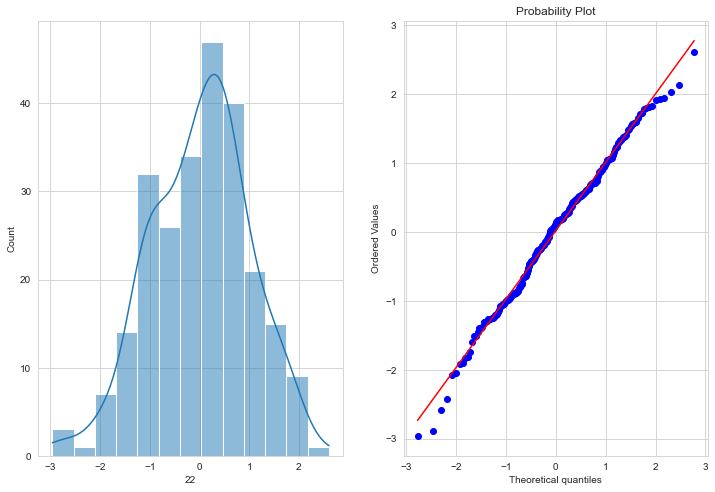

In [36]:
plot1=QQ_plot(data_copy,data_copy.columns[23])

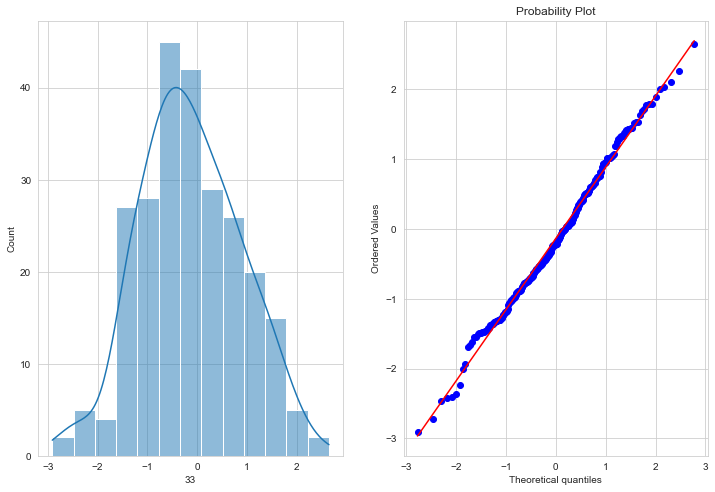

In [37]:
plot2=QQ_plot(data_copy,data_copy.columns[34])

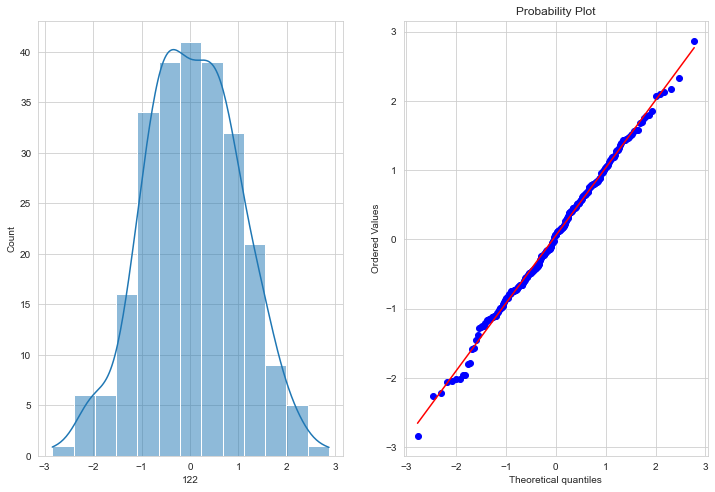

In [38]:
plot3=QQ_plot(data_copy,data_copy.columns[123])

QQ plot is used to tell whether feature follows gaussian distribution or not.

It is also used to check whether features are coming for the same distribution or not.

If the points lie perfectly line on line than it gaussian distribution.

We can see that features somewhat follow gaussian distribution.

In [39]:
y=data['target'].values
X=data.drop(['id','target'],axis=1)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [41]:
print((X_train.shape),y_train.shape)
print((X_test.shape),y_test.shape)

(175, 300) (175,)
(75, 300) (75,)


## Checking for overfitting by measuring train and test error

We have made various models to check the overfitting by making train test error plot

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 107.16it/s]


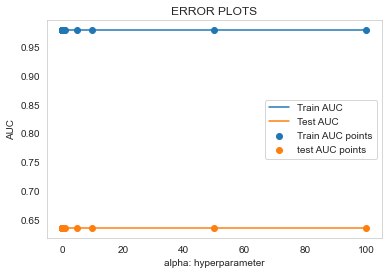

In [42]:
# Refer Naive bayes ipynb notebook provided in naive bayes donor choose datset
train_roc_auc=[]
test_roc_auc=[]

alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in tqdm(alpha):
    naive_bayes=GaussianNB()
    naive_bayes.fit(X_train,y_train)
    y_pred_train=naive_bayes.predict(X_train)
    y_pred_test=naive_bayes.predict(X_test)
    train_roc_auc.append(roc_auc_score(y_train,y_pred_train))
    test_roc_auc.append(roc_auc_score(y_test,y_pred_test))
    
plt.plot(alpha, train_roc_auc, label='Train AUC')
plt.plot(alpha, test_roc_auc, label='Test AUC')

plt.scatter(alpha, train_roc_auc, label='Train AUC points')
plt.scatter(alpha, test_roc_auc, label='test AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

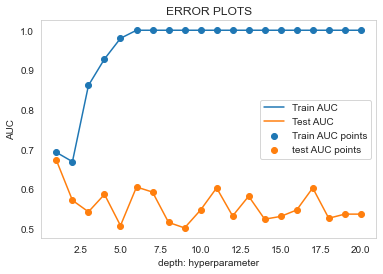

In [43]:

list1_train=[]
list2_test=[]
depth = [i for i in range(1, 21)]
for i in depth:
    decision_tree = DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(X_train, y_train)
    y_pred_train=decision_tree.predict(X_train)
    y_pred_test=decision_tree.predict(X_test)
    list1_train.append(roc_auc_score(y_train,y_pred_train))
    list2_test.append(roc_auc_score(y_test,y_pred_test))
 

plt.plot(depth, list1_train, label='Train AUC')
plt.plot(depth, list2_test, label='Test AUC')

plt.scatter(depth, list1_train, label='Train AUC points')
plt.scatter(depth, list2_test, label='test AUC points')

plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

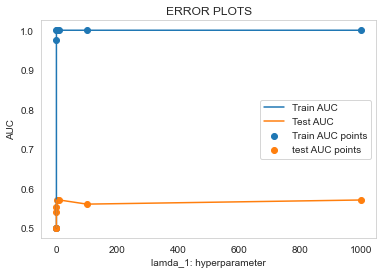

In [44]:
list1_train=[]
list2_test=[]
lambda_1=[0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in lambda_1:
    model = LogisticRegression(C=i)
    model.fit(X_train, y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    list1_train.append(roc_auc_score(y_train,y_pred_train))
    list2_test.append(roc_auc_score(y_test,y_pred_test))
 

plt.plot(lambda_1, list1_train, label='Train AUC')
plt.plot(lambda_1, list2_test, label='Test AUC')

plt.scatter(lambda_1, list1_train, label='Train AUC points')
plt.scatter(lambda_1, list2_test, label='test AUC points')

plt.legend()
plt.xlabel("lamda_1: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

We can see that while simple making train and test error plot of above classifiers our model is overfitting

## Orthogonality of Features

Checking The orthogonality of features.If features are not orthogonal i will do PCA otherwise not.

In [45]:
data_copy=data_copy.drop(['target'],axis=1)

In [46]:
data_copy.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [47]:
len(data_copy.columns)

300

In [48]:
dot_product=[]
for i in range(len(data_copy.columns)):
    for j in range(i+1,len(data_copy.columns)):
        dot=np.dot(data_copy[str(i)],data_copy[str(j)])
        dot_product.append(dot)
        
print(len(dot_product))

44850


In [49]:
orthogonal_list=[]
for i in orthogonal_list:
    if i==0:
        orthogonal_list.append(i)
print(orthogonal_list)

[]


The above dot product shows that my features are not orthogonal with each other.Since they are not orthogonal I have done PCA and will take that feature whose variance is maximum.

## PCA

In [79]:
X_train.shape

(175, 300)

In [80]:
data_copy.shape[0]

250

In [81]:
data_copy.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [82]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)

In [83]:
list1=[]
for i in range(1,X_train.shape[0]):
    pca=PCA(n_components=i)
    pca.fit_transform(X_train,y_train)
    list1.append(pca.explained_variance_ratio_)
    
print(list1)

[array([0.01706994]), array([0.01706994, 0.01658555]), array([0.01706994, 0.01658555, 0.01630111]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01536715]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01536715,
       0.0151422 ]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01536715,
       0.0151422 , 0.01494188]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01536715,
       0.0151422 , 0.01494188, 0.01453562]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01536715,
       0.0151422 , 0.01494188, 0.01453562, 0.01433055]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01536715,
       0.0151422 , 0.01494188, 0.01453562, 0.01433055, 0.01425841]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01536715,
       0.0151422 , 0.01494188, 0.01453562, 0.01433055, 0.01425841,
       0.01416346]), array([0.01706994, 0.01658555, 0.01630111, 0.01602297, 0.01

In [84]:
pca.n_components


174

In [85]:
val=np.arange(pca.n_components)+1

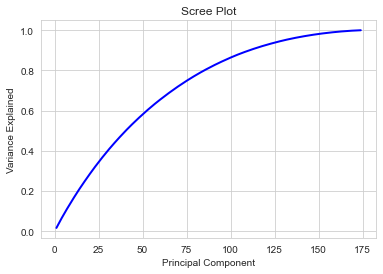

In [86]:
plt.plot(val, np.cumsum(pca.explained_variance_ratio_),linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Taking the number of components =150 because it has preserved 99% variance

In [87]:
pca_fitted=PCA(n_components=150)
pca_fitted_train=pca_fitted.fit_transform(X_train)
pca_fitted_test=pca_fitted.transform(X_test)

logistic regression

In [88]:
log_reg=LogisticRegression(class_weight='balanced')
train_auc=[]
cv_auc=[]

param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
best_cv=StratifiedKFold(n_splits=5)
classifier=GridSearchCV(estimator=log_reg,param_grid=param,cv=best_cv,scoring='roc_auc',n_jobs=-1,return_train_score=True)

In [89]:
classifier.fit(pca_fitted_train,y_train)
train_auc=classifier.cv_results_['mean_train_score']
train_auc_std=classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

print("best alpha/parameter",classifier.best_params_)


best alpha/parameter {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [90]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced', penalty=classifier.best_params_['penalty'],
         solver=classifier.best_params_['solver'])
log_reg_model.fit(pca_fitted_train,y_train )

LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

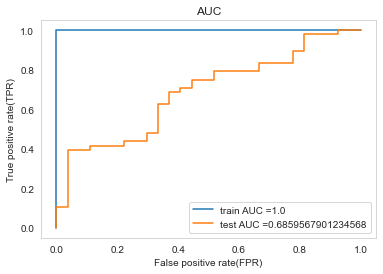

In [91]:
y_train_pred=log_reg_model.predict_proba(pca_fitted_train)
y_train_pred = y_train_pred[:, 1]

y_test_pred=log_reg_model.predict_proba(pca_fitted_test)
y_test_pred=y_test_pred[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

random forest

In [92]:
random_forest=RandomForestClassifier(class_weight='balanced')
params = {'n_estimators':[5,10,20],'max_depth':[2,3,5],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}

classifier=GridSearchCV(estimator=random_forest,param_grid=params,cv=best_cv,scoring='roc_auc',n_jobs=-1,return_train_score=True)
classifier.fit(pca_fitted_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [5, 10, 20]},
             return_train_score=True, scoring='roc_auc')

In [93]:
classifier.fit(pca_fitted_train,y_train)
train_auc=classifier.cv_results_['mean_train_score']
train_auc_std=classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

print("best alpha/parameter",classifier.best_params_)


best alpha/parameter {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20}


In [94]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features']                  )
random_forest_model.fit(pca_fitted_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', min_samples_split=6,
                       n_estimators=20)

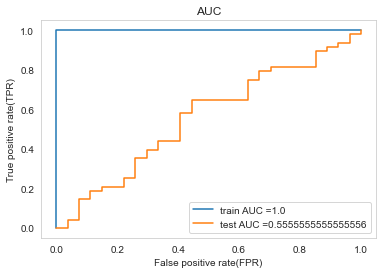

In [95]:
y_train_pred=random_forest_model.predict_proba(pca_fitted_train)
y_train_pred = y_train_pred[:, 1]

y_test_pred=random_forest_model.predict_proba(pca_fitted_test)
y_test_pred=y_test_pred[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

Xgboost

In [96]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators':[5,10,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5,1],
        'subsample':[0.1,0.3,0.5,1]
}
classifier=GridSearchCV(estimator=xgb,param_grid=param,cv=best_cv,scoring='roc_auc',n_jobs=-1,return_train_score=True)
classifier.fit(pca_fitted_train,y_train)

[17:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, mi...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-

In [98]:
classifier.fit(pca_fitted_train,y_train)
train_auc=classifier.cv_results_['mean_train_score']
train_auc_std=classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']

print("best alpha/parameter",classifier.best_params_)

[17:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0.5}


In [99]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)
xgb_model.fit(pca_fitted_train,y_train)

[17:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

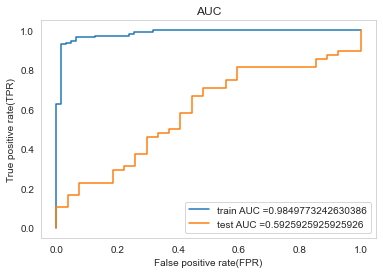

In [100]:
y_train_pred=xgb_model.predict_proba(pca_fitted_train)
y_train_pred = y_train_pred[:, 1]

y_test_pred=xgb_model.predict_proba(pca_fitted_test)
y_test_pred=y_test_pred[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [102]:
table=PrettyTable(['model','train_auc','test_auc'])
table.add_row(['Logistic_Regression',1.0,0.6859])
table.add_row(['Random_Forest',1.0,0.5555])
table.add_row(['Xgboost',0.9849,0.5925])
print(table)

+---------------------+-----------+----------+
|        model        | train_auc | test_auc |
+---------------------+-----------+----------+
| Logistic_Regression |    1.0    |  0.6859  |
|    Random_Forest    |    1.0    |  0.5555  |
|       Xgboost       |   0.9849  |  0.5925  |
+---------------------+-----------+----------+
